## Import requirements

You should have pandas and matplotlib installed.

Run:
$ pip install pandas matplotlib

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

## Read dataset

Dataset contains worldwide data about covid-19 from EU Open Data Portal.

Link: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

In [2]:
# Read the dataset
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

## Dataset Processing

Dataset contains information that are not useful for getting cases for specific countries by date, so they should be removed. Also, the dataset should be in reversed order in order to plot the cases in ascending order.

In [3]:
# Delete useless columns
data = data.drop(
    columns=[
             'day',
             'month',
             'year',
             'geoId',
             'continentExp',
             'countryterritoryCode',
             'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000',
             'popData2019'
             ]
    )

# Rename columns
data.rename(
    columns={
        'countriesAndTerritories': 'country',
        'dateRep': 'date'
        }, inplace=True)

# Reverse the data (Plots are showed in a better way)
data = data.reindex(index=data.index[::-1])

## Creating final dataset

Creating the final dataset with 2 columns {date, cases} which will contain the sum of worldwide cases in each date. 

In [4]:
# Get all unique dates
dates = data.date.unique()

# Create final dataset
final_data = pd.DataFrame(columns=['date', 'cases'])

# Fill new dataset with worldwide data 
for date in dates:
  cases = 0
  new_data = data[data['date'].str.contains(date)]
  cases += new_data.cases.sum()
  final_data = final_data.append({'date': date, 'cases': cases}, ignore_index=True)

print(final_data)

           date  cases
0    21/03/2020  31988
1    22/03/2020  34226
2    23/03/2020  34270
3    24/03/2020  44570
4    25/03/2020  42536
..          ...    ...
295  18/03/2020  17092
296  03/03/2020   1858
297  04/03/2020   2315
298  05/03/2020   2357
299  06/03/2020   3060

[300 rows x 2 columns]


## Final dataset processing

The date format is changed and sorted by datetime in order to plot the cases in the right way.

In [5]:
# Beutify dates
final_data.date = pd.to_datetime(final_data['date'], format='%d/%m/%Y')

# Sort dataset by date
final_data = final_data.sort_values(by=['date'])

print(final_data)

          date   cases
221 2019-12-31      27
222 2020-01-01       0
223 2020-01-02       0
224 2020-01-03      17
225 2020-01-04       0
..         ...     ...
214 2020-10-21  393215
215 2020-10-22  449093
216 2020-10-23  464560
217 2020-10-24  471153
218 2020-10-25  461299

[300 rows x 2 columns]


## Plot creation

Creating the cases plot with the right information.

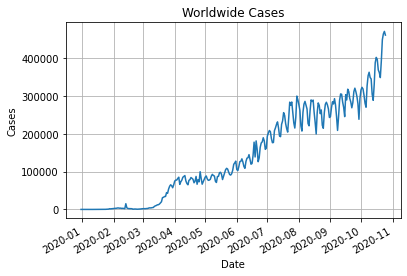

In [6]:
# Create plot
fig, ax = plt.subplots()
ax.plot(final_data['date'], final_data['cases'])

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Set labels
ax.set(xlabel='Date', ylabel='Cases', title='Worldwide Cases')

# Show plots
fig.autofmt_xdate()
ax.grid()
plt.show()

## Total cases

Calculating the total cases and printing them.

In [7]:
# Print total dates
total_cases = str(final_data.cases.sum())
print("Total cases: " + total_cases)

Total cases: 42758015
